Magic Gamma telescope readings
Objectives:

Prepare a model which can classify it with f1 score = 70% and accuracy = 75%.
Use neural networks combined with any HP parameter tuning.
You can make use of any preprocessing activities if needed.
No external data shall be added for increasing evaluation metric values.

In [1]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

Reading the dataset into python

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/magic_gamma_telescope04_.csv')
df.head()

,flength,fwidth,fsize,fconc,fconc1,fsym,fm3long,fm3trans,falpha,dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
df['class'].value_counts()

g    12332
h     6688
Name: class, dtype: int64

The class is mostly even between gamma and hadron classes

In [5]:
df.describe()


,flength,fwidth,fsize,fconc,fconc1,fsym,fm3long,fm3trans,falpha,dist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   flength   19020 non-null  float64
 1   fwidth    19020 non-null  float64
 2   fsize     19020 non-null  float64
 3   fconc     19020 non-null  float64
 4   fconc1    19020 non-null  float64
 5   fsym      19020 non-null  float64
 6   fm3long   19020 non-null  float64
 7   fm3trans  19020 non-null  float64
 8   falpha    19020 non-null  float64
 9   dist      19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [7]:
X = df.drop('class', axis=1).values
y = df['class'].values

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling

In [9]:
scale = MinMaxScaler()

In [10]:
train_fit = scale.fit(X_train)

In [11]:
X_train = train_fit.transform(X_train)
X_test = train_fit.transform(X_test)

Label Encoding

In [12]:
le = LabelEncoder()
y_en = le.fit_transform(y)
y_train_en = le.fit_transform(y_train)
y_test_en = le.fit_transform(y_test)

In [ ]:
X_train.shape, X_test.shape

Model Evaluation

Building an initial ANN model randomly to assess performance. Using two hidden layers with 16 neurons each.

In [13]:
model = Sequential()

model.add(Dense(16, input_shape=(10,), activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5)

In [15]:
model.fit(X_train, y_train_en, batch_size=12, epochs=100, 
          validation_data=(X_test, y_test_en), callbacks=[early_stop])

Epoch 1/100
1268/1268 [==============================] - 4s 2ms/step - loss: 0.4971 - accuracy: 0.7628 - val_loss: 0.4281 - val_accuracy: 0.8026
Epoch 2/100
1268/1268 [==============================] - 2s 2ms/step - loss: 0.4127 - accuracy: 0.8140 - val_loss: 0.3998 - val_accuracy: 0.8186
Epoch 3/100
1268/1268 [==============================] - 3s 2ms/step - loss: 0.3964 - accuracy: 0.8292 - val_loss: 0.3906 - val_accuracy: 0.8283
Epoch 4/100
1268/1268 [==============================] - 4s 3ms/step - loss: 0.3886 - accuracy: 0.8325 - val_loss: 0.3908 - val_accuracy: 0.8281
Epoch 5/100
1268/1268 [==============================] - 2s 2ms/step - loss: 0.3839 - accuracy: 0.8344 - val_loss: 0.3783 - val_accuracy: 0.8389
Epoch 6/100
1268/1268 [==============================] - 3s 2ms/step - loss: 0.3782 - accuracy: 0.8357 - val_loss: 0.3740 - val_accuracy: 0.8407
Epoch 7/100
1268/1268 [==============================] - 2s 2ms/step - loss: 0.3746 - accuracy: 0.8395 - val_loss: 0.3699 - val_ac

In [16]:
ann_metrics = pd.DataFrame(model.history.history)
ann_metrics

,loss,accuracy,val_loss,val_accuracy
0,0.497089,0.762815,0.428145,0.802576
1,0.412666,0.814012,0.399750,0.818612
2,0.396356,0.829193,0.390635,0.828339
3,0.388550,0.832479,0.390833,0.828076
4,0.383931,0.834385,0.378348,0.838854
5,0.378152,0.835699,0.374004,0.840694
6,0.374637,0.839511,0.369936,0.842271
7,0.370608,0.842928,0.371180,0.839905
8,0.368992,0.843257,0.363714,0.843323
9,0.365686,0.846083,0.365546,0.844637


Evaluating Loss

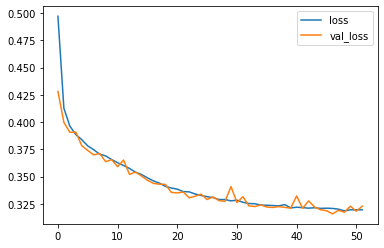

In [17]:
ann_metrics[['loss', 'val_loss']].plot()

Evaluating Accuracy

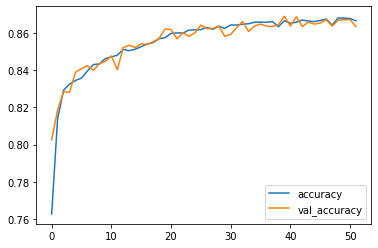

In [18]:
ann_metrics[['accuracy', 'val_accuracy']].plot()

The model has reached limit and would over fit on further epochs. Validation and train loss moving down togther is good indication

In [19]:
predictions = (model.predict(X_test) > 0.5).astype('int32')

119/119 [==============================] - 0s 1ms/step


In [20]:
print(classification_report(y_test_en, predictions))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      2460
           1       0.82      0.78      0.80      1344

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



In [21]:
confusion_matrix(y_test_en, predictions)

array([[2235,  225],
       [ 295, 1049]])

In [22]:
accuracy_score(y_test_en, predictions)

0.8633017875920084

In [23]:
f1_score(y_test_en, predictions)

0.8013750954927426

Just an initial model gave 79.37% accuracy and 79.44% f-1 score. Initial objectives completed.
Hyperparameter Tuning
We use grid search with a sklearn wrapper of keras called scikeras

In [24]:
def create_model(neurons, dropout_rate, optimizer='adam'):

	model = Sequential()
	model.add(Dense(neurons, input_shape=(10,), activation='relu'))
	model.add(Dropout(dropout_rate))
	model.add(Dense(1, activation='sigmoid'))
 
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model

In [25]:
optimizer = ['SGD', 'RMSprop', 'Adam']
dropout_rate = [0.2, 0.3, 0.4, 0.5]
neurons = [15, 20, 25, 30]

param_grid = dict(model__optimizer=optimizer, model__dropout_rate=dropout_rate, 
                  model__neurons=neurons)

In [26]:
model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y_en)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

We were able to improve accuracy upto 80%.